# Employee Emotions Analysis

This project aims to analyze employee well-being through internal surveys and anonymized exchanges (Slack, Teams, emails). The goal is to identify dominant emotions (stress, satisfaction, frustration, etc.) and provide recommendations to improve workplace quality of life.

## Importing librairies

In [2]:
# Importing librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
from transformers import pipeline

## Importing text data

In [ ]:
# Importing text data
text_data = pd.read_csv(r'D:\Projects\IT\Data Science & IA\Employee_Emotion_Analysis\Data\emotion.csv')

## Overview of text data

In [ ]:
# Loading and previewing data
text_data #Print data

In [4]:
text_data.info() #Info about the text data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           500 non-null    int64 
 1   Date         500 non-null    object
 2   Source       500 non-null    object
 3   Message      500 non-null    object
 4   Département  500 non-null    object
 5   Anonymisé    500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


## Preprocessing of text data with SpaCy

In [5]:
# Preprocessing with SpaCy
nlp = spacy.load("en_core_web_sm")

    # Define stop_words

custom_stop_word =  {
    "i", "you", "he", "she", "we", "they", "it", "my", "your", "his", "her", "our", "their",
    "me", "him", "us", "them", "is", "are", "was", "were", "be", "been", "being", 
    "a", "an", "the", "this", "that", "these", "those", "and", "but", "or", "if", "because", "so",
    "on", "in", "at", "by", "with", "about", "against", "between", "into", "through", "over", "under",
    "again", "further", "then", "once", "can", "will", "just", "should", "would", "could", "may", "might", "must","include", "mention", "already", "quickly", "soon", "allow", "out", "second", "far",
    "market", "million", "stock", "general", "industry", "economy", "nation", "education",
    "moment", "parent"
}
    # Cleaning and pre-treatment function
def preprocess_text(text):
    doc = nlp(text.lower()) #Convert to lower case
    tokens = [token.lemma_ for  token in doc if token.is_alpha and token.text not in custom_stop_word]
    return " ".join(tokens)

## Printing of column "Message cleaned" created after preprocessing

In [6]:
# Apply pre_treatment to the column [Message]
text_data['Message_cleaned'] = text_data['Message'].astype(str).apply(preprocess_text)

# Print
text_data[['Message', 'Message_cleaned']]

,Message,Message_cleaned
0,Director age stay catch home.,director age stay catch home
1,Maintain hand sing will buy administration men...,maintain hand sing buy administration
2,Culture daughter many nation catch under moment.,culture daughter many catch
3,Participant finally collection nearly simple d...,participant finally collection nearly simple d...
4,Thank body big act mother so air.,thank body big act mother air
...,...,...
495,Minute budget quickly then technology teacher ...,minute budget technology teacher onto
496,Door watch return carry now.,door watch return carry now
497,List design training marriage world nothing op...,list design training marriage world nothing op...
498,Pull another throw we behavior across break.,pull another throw behavior across break


## Exporting new text data

In [7]:
# Exporting text data
text_data.to_csv('message_cleaned.csv', index=False)

## Importing of new text data

In [8]:
# Importing text data cleaned
text = pd.read_csv(r'D:\Projects\IT\Data Science & IA\Employee_Emotion_Analysis\Data\message_cleaned.csv')


## Exploratory Data Analysis

In [9]:
# Count the most frequent words
word_freq = Counter([word for tokens in text['Message_cleaned'] for word in tokens.split()])

# Print 20 most common word
word_most_common = word_freq.most_common(20)

# Break down for visualization
words, counts = zip(*word_most_common)

### Graphical visualization about the most frequent words

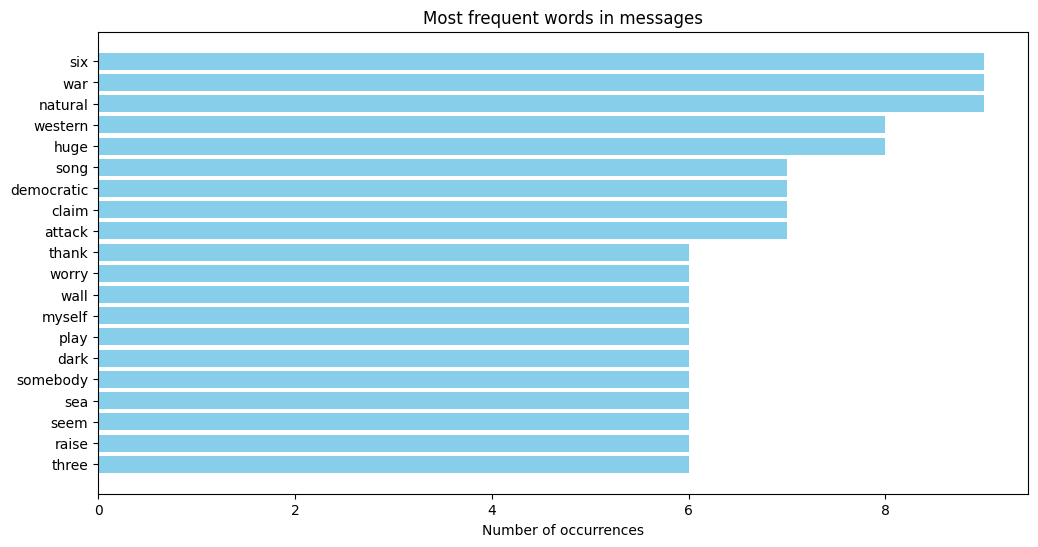

In [10]:
# Graphique des mots les plus fréquents
plt.figure(figsize=(12,6))
plt.barh(words, counts, color="skyblue")
plt.gca().invert_yaxis()  # Inverser l'axe pour que le plus fréquent soit en haut
plt.xlabel("Number of occurrences")
plt.title("Most frequent words in messages")
plt.show()

### Data Viz of Word Cloud

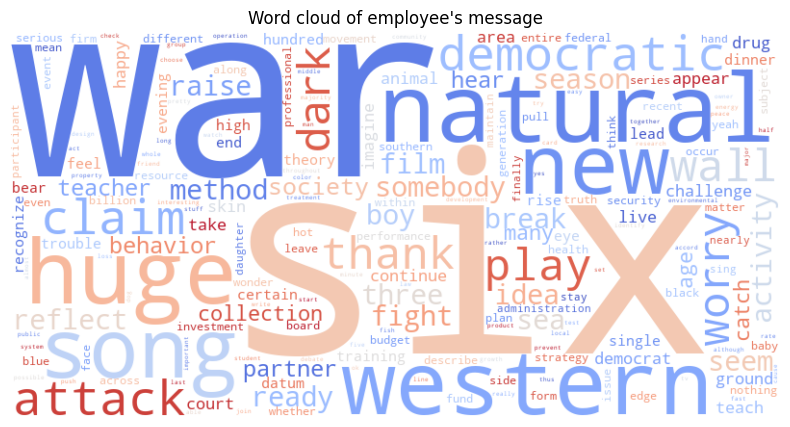

In [11]:
from wordcloud import WordCloud
all_text = " ".join(text["Message_cleaned"])

# Generate word cloud
wordcloud = WordCloud(height=400, width=800, background_color='white', colormap='coolwarm').generate(all_text)

# Graphical Visualization
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud of employee's message")
plt.show()

## Sentiment Analysis with VADER Sentiment

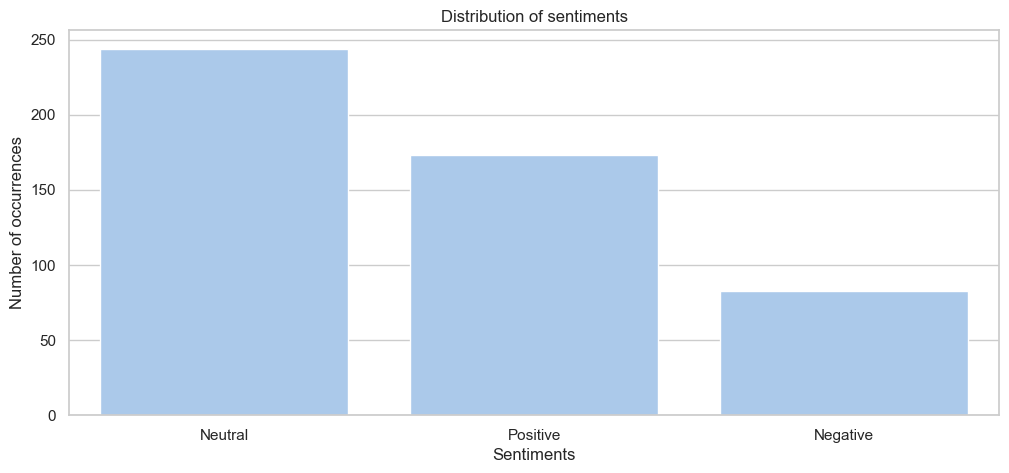

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Valeur entre -1 et 1, où -1 est négatif et 1 est positif

text['sentiment_score'] = text['Message_cleaned'].apply(analyze_sentiment)

# Define cateogorize of sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

text['sentiment'] = text['sentiment_score'].apply(categorize_sentiment)

# Counting feelings
sentiments_counts = text['sentiment'].value_counts()

# Graphical visualization
sns.set(style='whitegrid', palette='pastel',color_codes=True)
plt.figure(figsize=(12,5))
sns.barplot(x=sentiments_counts.index, y=sentiments_counts.values)
plt.xlabel('Sentiments')
plt.ylabel('Number of occurrences')
plt.title('Distribution of sentiments')
plt.show()


## Emotion Analysis with NRCLex

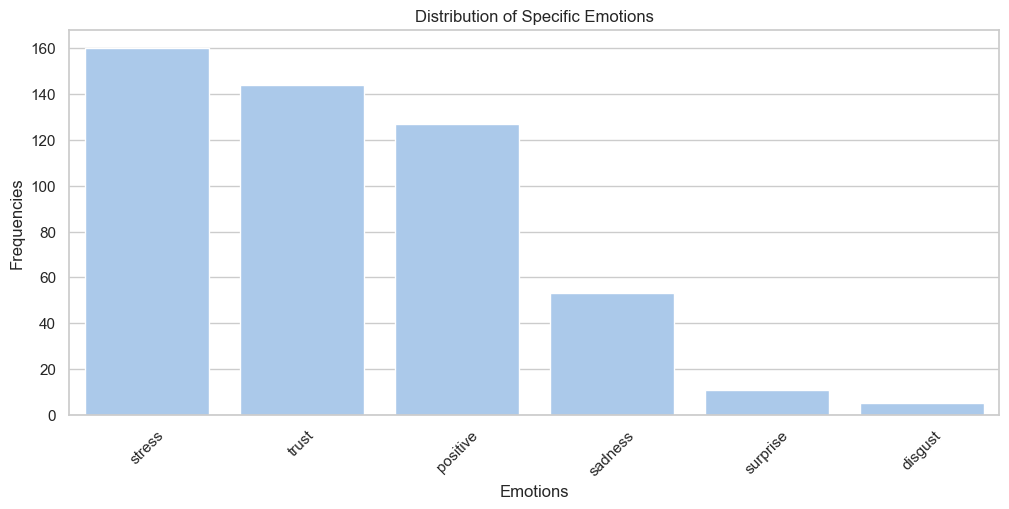

In [13]:
from nrclex import NRCLex

# Emotion analysis
def analyze_emotion(text):
    emotion = NRCLex(text)
    return emotion.raw_emotion_scores  # Renvoie les scores des émotions

# Appliquer l'analyse des émotions sur les messages
text['emotion_score'] = text['Message_cleaned'].apply(analyze_emotion)

# Extraction des émotions spécifiques
def extract_specific_emotion(score):
    relevant_emotion = {
        'stress': score.get('stress', 0),
        'anticipation': score.get('satisfaction', 0),
        'sadness': score.get('sadness', 0),
        'joy': score.get('wellbeing', 0),
        'fear': score.get('frustration', 0),
        'trust': score.get('trust', 0),
        'disgust' : score.get('disgust',0),
        'surprise': score.get('surprise',0),
        'positive': score.get('positive',0)
    }
    return relevant_emotion  # Renvoie le dictionnaire des émotions spécifiques

# Appliquer l'extraction des émotions spécifiques
text['specific_emotion'] = text['emotion_score'].apply(extract_specific_emotion)

# Compter les émotions spécifiques
emotion_specific = text['specific_emotion'].apply(lambda x: max(x, key=x.get))

# Compter les occurrences de chaque émotion spécifique
emotion_counts = emotion_specific.value_counts()

# Visualisation de la distribution des émotions spécifiques
plt.figure(figsize=(12,5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Specific Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequencies')
plt.xticks(rotation=45)
plt.show()


## Evolution of emotions over time

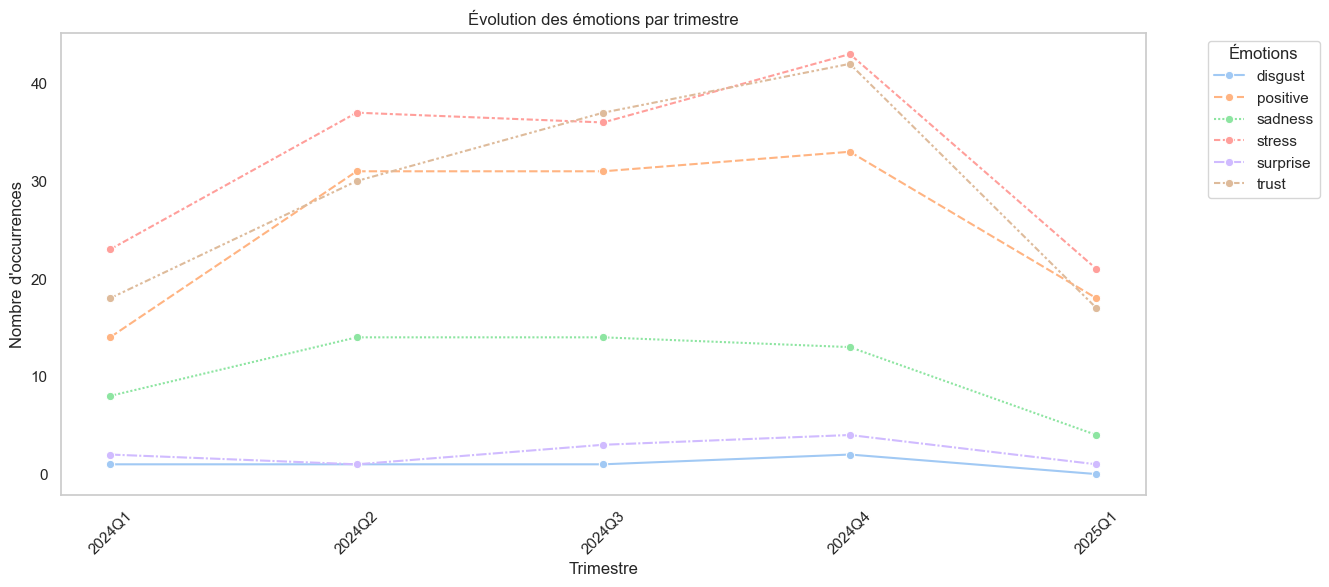

In [ ]:
# Convertir 'Date' en datetime
text['Date'] = pd.to_datetime(text['Date'])

# Extraire le trimestre et l'année sous forme de chaîne
text['Trimestre'] = text['Date'].dt.to_period('Q').astype(str)

# Compter les émotions par trimestre
emotion_trend = text.groupby(['Trimestre', 'dominant_emotion']).size().unstack(fill_value=0)

# Tracer le lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(data=emotion_trend, marker='o')

plt.title("Évolution des émotions par trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Rotation pour lisibilité
plt.grid()
plt.legend(title="Émotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Analysis of emotions by department

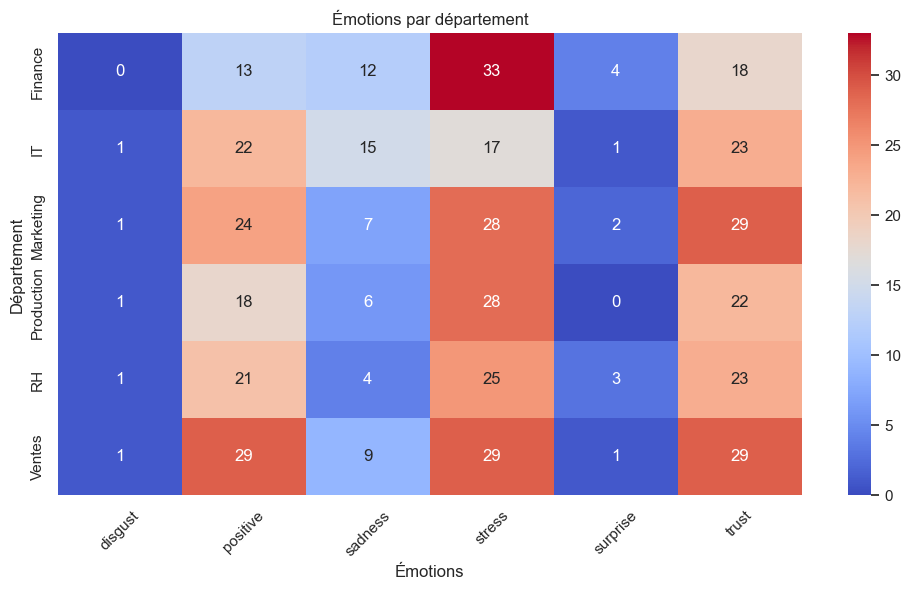

In [15]:
# Compter les émotions par département
emotion_by_dept = text.groupby(['Département', 'dominant_emotion']).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(emotion_by_dept, cmap="coolwarm", annot=True, fmt="d")
plt.title("Émotions par département")
plt.xlabel("Émotions")
plt.ylabel("Département")
plt.xticks(rotation=45)
plt.show()

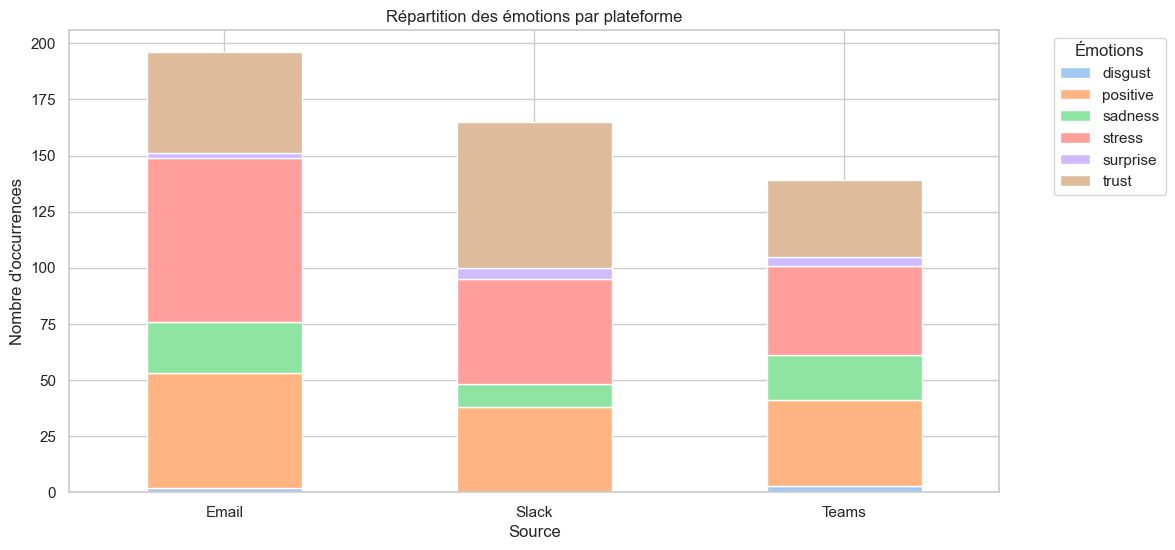

In [16]:
# Compter les émotions par source (Slack, Email, Teams)
emotion_by_source = text.groupby(['Source', 'dominant_emotion']).size().unstack(fill_value=0)

# Barplot empilé
emotion_by_source.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Répartition des émotions par plateforme")
plt.xlabel("Source")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=0)
plt.legend(title="Émotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()